# Language classification project

## Imports 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nomce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nomce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data 

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/olwethu-gif/Language-text-classification/main/train_set.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/olwethu-gif/Language-text-classification/main/test_set.csv')

In [3]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [4]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


## 2 Data cleaning 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [7]:
df_test.tail()

,index,text
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [8]:
#changing the language id to numeric id
# Mapping of language IDs to numeric labels
language_mapping = {
    'afr': 1,
    'eng': 2,
    'nbl': 3,
    'nso': 4,
    'sot': 5,
    'ssw': 6,
    'tsn': 7,
    'tso': 8,
    'ven': 9,
    'xho': 10,
    'zul': 11
}

df_train['lang_id'] = df_train['lang_id'].map(language_mapping)


In [9]:
df_train.head()

,lang_id,text
0,10,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,10,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,2,the province of kwazulu-natal department of tr...
3,4,o netefatša gore o ba file dilo ka moka tše le...
4,9,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [10]:
#check for duplicates 
df_train.duplicated().sum()

3052

In [11]:
#dropping the duplicated text 
df_train = df_train.drop_duplicates(keep='first')

In [12]:
df_train.duplicated().sum()

0

## EDA 

Under EDA we will further look into our data.
- First look at the distribution of each language in the dataset 

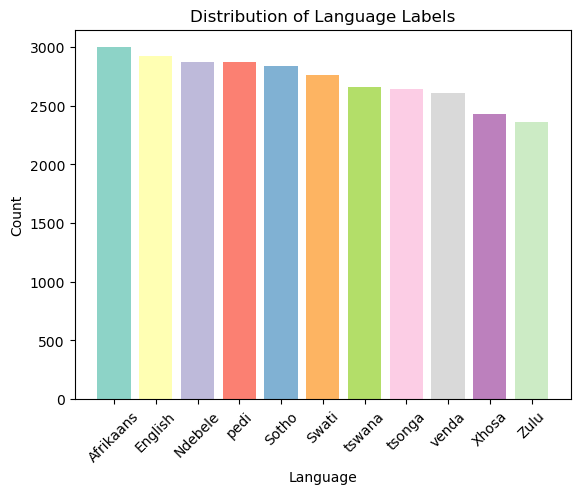

<Figure size 1000x600 with 0 Axes>

In [13]:
import seaborn as sns
# Calculate the frequency counts of each sentiment category
lang_id_counts = df_train['lang_id'].value_counts()

# Define the labels for each sentiment category
labels = [
    'Afrikaans',
    'English', 
    'Ndebele',
    'pedi',
    'Sotho',
    'Swati',
    'tswana',
    'tsonga',
    'venda',
    'Xhosa',
    'Zulu'
]

# Visualize the data
colors = sns.color_palette('Set3')

plt.bar(labels, lang_id_counts, color=colors)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Distribution of Language Labels')
plt.xticks(rotation=45)
plt.figure(figsize=(10, 6))
#plt.bar(labels, lang_id_counts)
plt.show()



The above bar plot shows the distribution from the highest to low but then we cannot clearly see the difference in from this graph. So lets plot another visual to see the difference

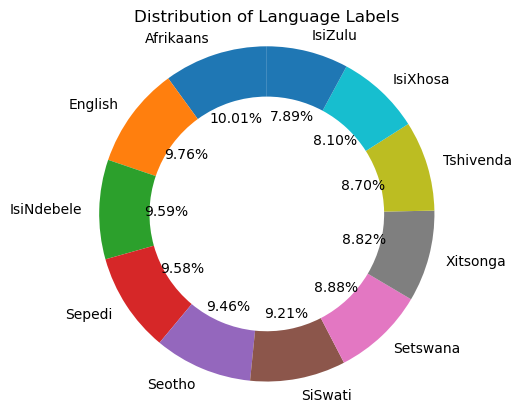

In [14]:
import matplotlib.pyplot as plt

label_counts = df_train['lang_id'].value_counts()
labels = ['Afrikaans', 'English', 'IsiNdebele', 'Sepedi', 'Seotho', 'SiSwati', 'Setswana', 'Xitsonga', 'Tshivenda', 'IsiXhosa', 'IsiZulu']

fig, ax = plt.subplots()
ax.pie(label_counts, labels=labels, autopct='%0.2f%%', startangle=90, wedgeprops=dict(width=0.3))
ax.axis('equal')  # Equal aspect ratio ensures a circular shape
ax.set_title('Distribution of Language Labels')

plt.show()


Great! Now we can see the difference in distribution though there isn't much difference

Next under this section we are going to add some features to help with our analysis. 
We going to count the number of characters and number of words per text. 

In [15]:
df_train['num_characters'] = df_train['text'].apply(len) 
df_train.head()

,lang_id,text,num_characters
0,10,umgaqo-siseko wenza amalungiselelo kumaziko ax...,220
1,10,i-dha iya kuba nobulumko bokubeka umsebenzi na...,252
2,2,the province of kwazulu-natal department of tr...,264
3,4,o netefatša gore o ba file dilo ka moka tše le...,217
4,9,khomishini ya ndinganyiso ya mbeu yo ewa maana...,239


In [16]:
df_test['num_characters'] = df_test['text'].apply(len) 


In [17]:
df_train['num_words'] = df_train['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [38]:
df_test['num_words'] = df_test['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In the following section we going to look at the  

In [23]:
df_train[df_train['lang_id'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,2641.000000,2641.000000
mean,245.971980,39.216206
std,28.633313,6.658713
min,201.000000,15.000000
25%,220.000000,34.000000
50%,244.000000,39.000000
75%,270.000000,44.000000
max,299.000000,63.000000


In [24]:
df_train[df_train['lang_id'] == 2][['num_characters','num_words']].describe()

,num_characters,num_words
count,2998.000000,2998.000000
mean,245.836558,40.241494
std,28.468270,6.141126
min,201.000000,23.000000
25%,221.000000,36.000000
50%,244.000000,40.000000
75%,270.000000,45.000000
max,299.000000,63.000000


In [25]:
df_train[df_train['lang_id'] == 3][['num_characters','num_words']].describe()

,num_characters,num_words
count,2362.000000,2362.000000
mean,244.928874,25.860711
std,28.421482,3.710122
min,201.000000,17.000000
25%,219.000000,23.000000
50%,244.000000,26.000000
75%,268.000000,28.000000
max,299.000000,40.000000


In [26]:
df_train[df_train['lang_id'] == 4][['num_characters','num_words']].describe()

,num_characters,num_words
count,2873.000000,2873.000000
mean,241.891751,45.229029
std,28.287960,6.735898
min,201.000000,27.000000
25%,217.000000,40.000000
50%,238.000000,45.000000
75%,265.000000,50.000000
max,299.000000,69.000000


In [27]:
df_train[df_train['lang_id'] == 5][['num_characters','num_words']].describe()

,num_characters,num_words
count,2833.000000,2833.000000
mean,246.845041,45.715143
std,28.998861,6.661274
min,201.000000,27.000000
25%,221.000000,41.000000
50%,245.000000,45.000000
75%,272.000000,50.000000
max,299.000000,69.000000


In [28]:
df_train[df_train['lang_id'] == 6][['num_characters','num_words']].describe()

,num_characters,num_words
count,2426.000000,2426.000000
mean,244.656224,26.390767
std,28.339018,3.944227
min,201.000000,17.000000
25%,220.000000,23.000000
50%,241.000000,26.000000
75%,269.000000,29.000000
max,299.000000,39.000000


In [29]:
df_train[df_train['lang_id'] == 7][['num_characters','num_words']].describe()

,num_characters,num_words
count,2869.000000,2869.000000
mean,245.770652,44.918787
std,28.710447,6.460698
min,201.000000,27.000000
25%,220.000000,40.000000
50%,244.000000,45.000000
75%,271.000000,49.000000
max,299.000000,68.000000


In [30]:
df_train[df_train['lang_id'] == 8][['num_characters','num_words']].describe()

,num_characters,num_words
count,2758.000000,2758.000000
mean,245.065265,42.874547
std,28.394012,5.987976
min,201.000000,28.000000
25%,220.000000,38.000000
50%,243.000000,42.000000
75%,269.000000,47.000000
max,299.000000,65.000000


In [31]:
df_train[df_train['lang_id'] == 9][['num_characters','num_words']].describe()

,num_characters,num_words
count,2605.00000,2605.000000
mean,245.68023,44.274856
std,28.30268,6.181435
min,201.00000,27.000000
25%,221.00000,40.000000
50%,243.00000,44.000000
75%,269.00000,49.000000
max,299.00000,65.000000


In [32]:
df_train[df_train['lang_id'] == 10][['num_characters','num_words']].describe()

,num_characters,num_words
count,2659.00000,2659.000000
mean,245.11320,27.314780
std,28.30066,4.058801
min,201.00000,15.000000
25%,221.00000,24.000000
50%,243.00000,27.000000
75%,269.00000,30.000000
max,299.00000,42.000000


In [33]:
df_train[df_train['lang_id'] == 11][['num_characters','num_words']].describe()

,num_characters,num_words
count,2924.000000,2924.000000
mean,242.846443,26.580711
std,28.472205,3.972707
min,201.000000,14.000000
25%,218.000000,24.000000
50%,240.000000,26.000000
75%,265.000000,29.000000
max,299.000000,43.000000


## Data preprocesssing 

In [34]:
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemmatizer = WordNetLemmatizer()

def text_processing(text):
    text = word_tokenize(text.lower())
    filtered_text = []
    for word in text:
        if word.isalnum():
            filtered_text.append(word)

    lemmatized_text = []
    for word in filtered_text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            lemmatized_word = lemmatizer.lemmatize(word)
            lemmatized_text.append(lemmatized_word)

    return " ".join(lemmatized_text)


In [35]:
df_train['new_text'] = df_train['text'].apply(text_processing)

In [36]:
df_test['new_text'] = df_test['text'].apply(text_processing)

In [37]:
df_test.head()

,index,text,num_characters,num_words,new_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",58,12,mmasepala fa maemo kgethegileng letlelela kgat...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,109,11,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,42,8,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,60,8,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,29,5,winste op buitelandse valuta


## Modeling 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [42]:
# Assign 'load_shortfall_3h' column to y
y = df_train['lang_id']

# Create X by dropping 'load_shortfall_3h' column from df_train
X = df_train.drop('lang_id',axis = 1)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [44]:
X = tf.fit_transform(df_train['new_text']).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y = np.array(df_train['lang_id'])

y

array([10, 10,  2, ...,  2, 10,  5], dtype=int64)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [48]:
y_train

array([6, 7, 2, ..., 7, 5, 9], dtype=int64)

In [49]:

# Initialize and train the SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Print the predicted language IDs for the test data
#print(y_pred)

In [50]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       553
           2       0.99      1.00      1.00       603
           3       0.95      0.94      0.94       473
           4       1.00      1.00      1.00       559
           5       1.00      1.00      1.00       606
           6       0.97      0.98      0.98       481
           7       1.00      1.00      1.00       543
           8       1.00      1.00      1.00       548
           9       1.00      1.00      1.00       509
          10       0.96      0.98      0.97       503
          11       0.97      0.95      0.96       612

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



In [236]:
#Naive...
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate and print the classification report, including the F1 score
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       553
           2       0.98      1.00      0.99       603
           3       0.96      0.95      0.96       473
           4       1.00      1.00      1.00       559
           5       1.00      1.00      1.00       606
           6       0.99      0.96      0.98       481
           7       1.00      1.00      1.00       543
           8       1.00      1.00      1.00       548
           9       1.00      1.00      1.00       509
          10       0.98      0.97      0.98       503
          11       0.95      0.97      0.96       612

    accuracy                           0.99      5990
   macro avg       0.99      0.99      0.99      5990
weighted avg       0.99      0.99      0.99      5990



In [237]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Assuming you have the true labels (y_test) for the test data
# Replace 'true_labels' with the actual true labels if available
#y_test = ['lang_id']

# Calculate and print the classification report, including the F1 score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       553
           2       0.99      0.98      0.99       603
           3       0.93      0.88      0.90       473
           4       1.00      0.99      0.99       559
           5       1.00      1.00      1.00       606
           6       0.90      0.95      0.92       481
           7       0.99      1.00      0.99       543
           8       1.00      1.00      1.00       548
           9       1.00      1.00      1.00       509
          10       0.94      0.94      0.94       503
          11       0.91      0.90      0.90       612

    accuracy                           0.97      5990
   macro avg       0.97      0.97      0.97      5990
weighted avg       0.97      0.97      0.97      5990



In [51]:
import numpy as np
import pandas as pd

predict = ['afri', 'eng', 'nbl', 'nso', 'nso', 'sot', 'ssw', 'tsn', 'tso', 'ven', 'xho', 'zul']
number_of_rows = 5682

# Repeat the predict list until it reaches or exceeds the desired number of rows
lang_ids = np.tile(predict, (number_of_rows // len(predict)) + 1)[:number_of_rows]

# Create a DataFrame with index and lang_id columns
language = pd.DataFrame({'index': range(1, number_of_rows + 1), 'lang_id': lang_ids})

# Save the DataFrame to a CSV file
language.to_csv('language.csv', index=False)